<a href="https://colab.research.google.com/github/BonyGeorge/Wheat-Impurities-Detection/blob/master/SRS%20Models/Wheat_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wheat Detection using YOLOv5.

## Mounting Google Drive to save weights.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Cloning the Yolov5 architecture.

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 3650 (delta 12), reused 15 (delta 8), pack-reused 3624
Receiving objects: 100% (3650/3650), 7.11 MiB | 35.33 MiB/s, done.
Resolving deltas: 100% (2440/2440), done.


## Unziping the images in the drive.

In [3]:
!unzip /content/gdrive/MyDrive/dataset/wheat_data.zip -d yolov5

Streaming output truncated to the last 5000 lines.
  inflating: yolov5/wheat_data/images/train/f8f466cc9.jpg  
  inflating: yolov5/wheat_data/images/train/eaeda7363.jpg  
  inflating: yolov5/wheat_data/images/train/1364f7561.jpg  
  inflating: yolov5/wheat_data/images/train/a5df11e9f.jpg  
  inflating: yolov5/wheat_data/images/train/22eabfde5.jpg  
  inflating: yolov5/wheat_data/images/train/36fb90706.jpg  
  inflating: yolov5/wheat_data/images/train/fc8cf268b.jpg  
  inflating: yolov5/wheat_data/images/train/eac655fcc.jpg  
  inflating: yolov5/wheat_data/images/train/70dd6f08f.jpg  
  inflating: yolov5/wheat_data/images/train/9d78cb5d0.jpg  
  inflating: yolov5/wheat_data/images/train/ce9534fc2.jpg  
  inflating: yolov5/wheat_data/images/train/8115795f7.jpg  
  inflating: yolov5/wheat_data/images/train/1e58125ec.jpg  
  inflating: yolov5/wheat_data/images/train/f52f20733.jpg  
  inflating: yolov5/wheat_data/images/train/a555ed46d.jpg  
  inflating: yolov5/wheat_data/images/train/eb983

## Entering the directory

In [4]:
cd yolov5

/content/yolov5


## Important libraries.
### For running yaml file and Statistics of our model.

In [5]:
!pip install -U PyYAML
!pip install wandb

     |████████████████████████████████| 276kB 17.3MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=9b395e3079be09c196292ceb1353c088be88b3202672f22edcff0b9b7f212731
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.8MB 13.4MB/s 
     |████████████████████████████████| 133kB 53.4MB/s 
     |████████████████████████████████| 102kB 15.2MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
     |████████████████████████████████| 163kB 52.4MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6490 sha256=f0c32099b47f6aba75e1c6fd5bc16a02b62739c89071c5d08c19ee303a151883
  Stored in directory: /root/.cache/pi

## Trainnig Our Model on the dataset.

In [6]:
!python train.py --img 1024 --batch 8 --epochs 10 --data wheat.yaml --cfg models/yolov5s.yaml --name WheatModel

Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='wheat.yaml', device='', epochs=10, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[1024, 1024], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='WheatModel', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/WheatModel', single_cls=False, sync_bn=False, total_batch_size=8, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-30 01:00:43.566001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_

## Evaluating Our Model.

In [8]:
!python detect.py --source /content/yolov5/input/test/ --weights best.pt --conf 0.4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov5/input/test/', update=False, view_img=False, weights=['best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/1 /content/yolov5/input/test/download.jpeg: 448x640 1 Healthy Wheat Corps, Done. (0.013s)
Results saved to runs/detect/exp2
Done. (0.052s)


## Show the resulted image.

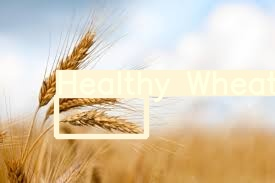

In [11]:
from IPython.display import Image
Image(filename='runs/detect/exp2/download.jpeg', width=600, height=900)

## Showing the matricies

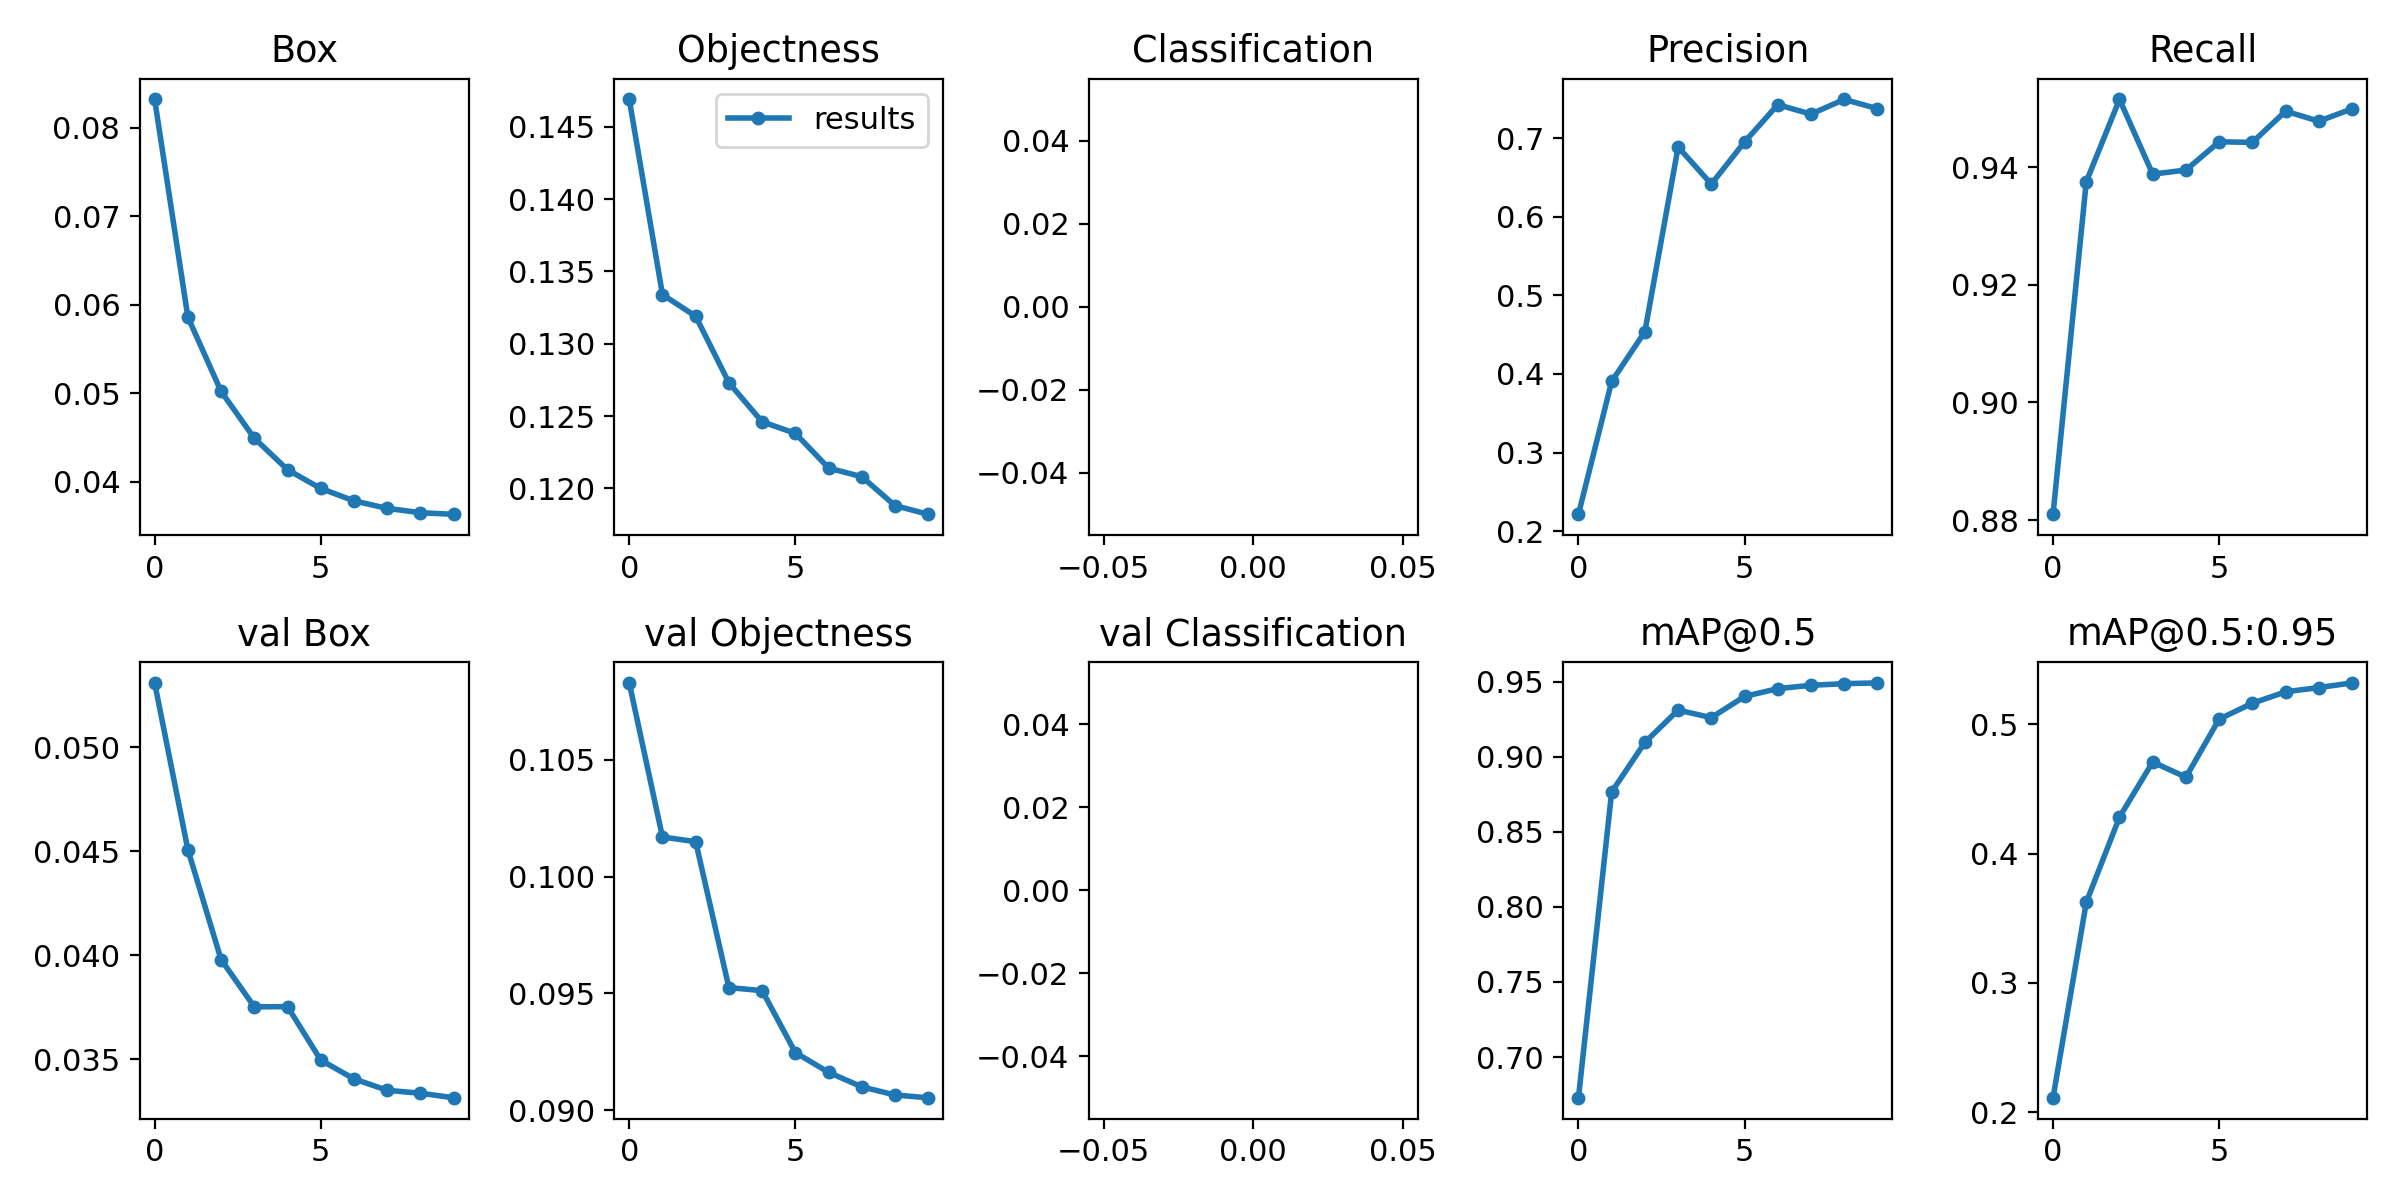

In [12]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/WheatModel/')
Image(filename='runs/train/WheatModel/results.png', width=800)



<center><h2>End of Document.</h2></center>

